In [2]:
import cosine_search
from nltk.stem.snowball import FinnishStemmer
import spacy
from collections import Counter
import matplotlib.pyplot as plt 
stemmer = FinnishStemmer()
nlp = spacy.load("fi_core_news_sm") # load the model that will be used for the task

Counter({'ruots': 11, 'israel': 10, 'helsing': 8, 'suome': 7, 'venäj': 7, 'kenia': 5, 'ukrain': 5, 'rosten': 4, 'sinkkuil': 4, 'lonto': 4, 'ypäj': 4, 'rovaniem': 3, 'chat': 3, 'suomi': 3, 'vuosaar': 3, 'kokkol': 3, 'saks': 3, 'alankom': 3, 'tunnuks': 2, 'andersen': 2, 'matkatover': 2, 'areen': 2, 'rentol': 2, 'budapest': 2, 'blomqvist': 2, 'vuotalo': 2, 'politiikkaradio': 2, 'ukr': 2, 'tansk': 2, 'kankaanp': 2, 'rafah': 2, 'katselusuom': 1, 'rosten-konsern': 1, 'turu': 1, 'por': 1, 'lounais-suom': 1, 'vera': 1, 'salo': 1, 'elintarviketeollisuusliito': 1, 'tamper': 1, 'väylävirasto': 1, 'oulu': 1, 'helsink': 1, 'porvo': 1, 'vant': 1, 'poriparisuht': 1, 'katseluluovutua': 1, 'turk': 1, 'ruot': 1, 'malmö': 1, 'euroviisu': 1, 'katselubernt': 1, 'kotk': 1, 'hamin': 1, 'vaasa': 1, 'kristiinankaupunk': 1, 'vertailukoht': 1, 'eu:': 1, 'mummodisko': 1, 'kyrönmaa-lehd': 1, 'maraton': 1, 'kaptagat': 1, 'kiptum': 1, 'usa': 1, 'peking': 1, 'ransk': 1, 'münchen': 1, 'ylläskartano': 1, 'katselurampat

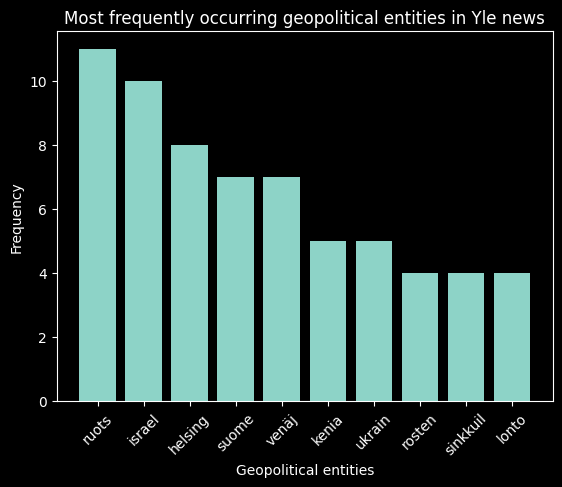

In [3]:
def get_entities(documents): 
    entities = []
    for document in documents:
        doc = nlp(document) # parse the text with the loaded model
        for ent in doc.ents:
            if ent.label_ == "GPE": # append all geopolitical entities to a list
                entities.append(ent.text)
    
    stemmed_entities = [stemmer.stem(ent) for ent in entities] # stem the entities
    for ent in stemmed_entities:
        if ent == "suome" or ent == "suomi": # if entity is suomi, remove it from the list
            stemmed_entities.remove(ent)      
    entity_freq = Counter(stemmed_entities) # count the occurrences of each stemmed entity
        
    print(entity_freq) # debug 
    return entity_freq

In [ ]:
def plot_entities(entity_freq, n):
    most_common_entities = entity_freq.most_common(n) # get the most common entities with their frequencies
    entities, frequencies = zip(*most_common_entities) # unpack the list and group entities and frequencies to their own variables
    
    plt.figure() 
    plt.bar(entities, frequencies)
    plt.title('Most frequently occurring geopolitical entities in Yle news') # add a title   
    plt.xlabel('Geopolitical entities') # name the x-axis   
    plt.ylabel('Frequency') # name of the y-axis
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def main():
    df_ex = cosine_search.read_data() # read the data into the df_ex variable
    documents = df_ex["text"].tolist()
    entity_freq = get_entities(documents)
    plot_entities(entity_freq, 10)
    
    
if __name__ == "__main__":

    main()